In [20]:
from model import CNN
from data_generator import DataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.misc import imresize
from scipy.ndimage import zoom

In [21]:
model = CNN(input_shape=(28, 28, 1),
            nb_classes=10)
data_generator = DataGenerator(batch_size=64,
                               is_training=True,
                               flatten=False)

In [22]:
model.fit(data_generator, nb_epoch=10, model_dir='./model')


epoch 1 / 10
937/938  loss : 0.0090  acc : 1.0000
epoch 2 / 10
937/938  loss : 0.0428  acc : 0.9688
epoch 3 / 10
937/938  loss : 0.0009  acc : 1.0000
epoch 4 / 10
937/938  loss : 0.0004  acc : 1.0000
epoch 5 / 10
937/938  loss : 0.0285  acc : 0.9688
epoch 6 / 10
937/938  loss : 0.0017  acc : 1.0000
epoch 7 / 10
937/938  loss : 0.0008  acc : 1.0000
epoch 8 / 10
937/938  loss : 0.0002  acc : 1.0000
epoch 9 / 10
937/938  loss : 0.0886  acc : 0.9688
epoch 10 / 10
937/938  loss : 0.0009  acc : 1.0000
Training is done ... 


In [24]:
test_generator = DataGenerator(batch_size=64,
                               is_training=False,
                               flatten=False)

In [25]:
model.evaluate_generator(test_generator)

0.9922

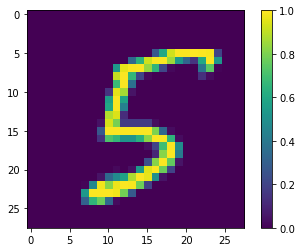

In [26]:
x, y = next(test_generator())
sampling_index = 23
_x = x[sampling_index]
_y = y[sampling_index]
_x = np.expand_dims(_x, 0)
_y = np.argmax(_y)
plt.figure()
plt.imshow(_x[0].reshape(28, 28))
plt.colorbar()

In [27]:
alpha = tf.reduce_mean(tf.gradients(model.logit[:, _y], model.feature_map)[0], axis=[1, 2], keep_dims=True)
l = tf.nn.relu(tf.reduce_sum(alpha*model.feature_map, axis=-1))
sal = model.sess.run(l,
                     feed_dict={model.input_: x})

/home/nakatsuka/anaconda3/envs/tf15/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


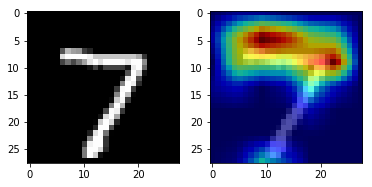

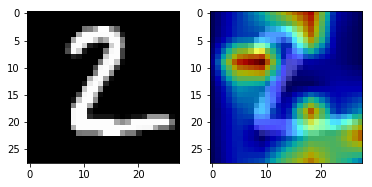

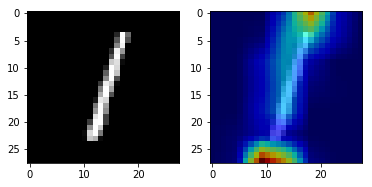

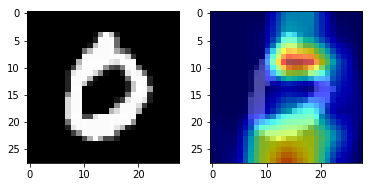

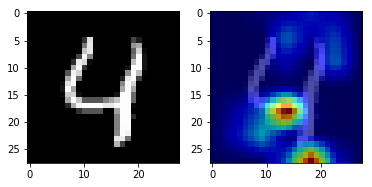

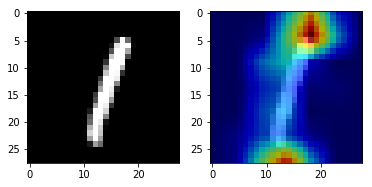

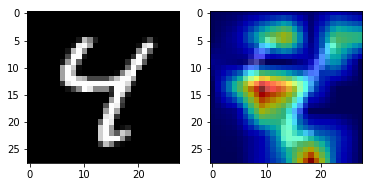

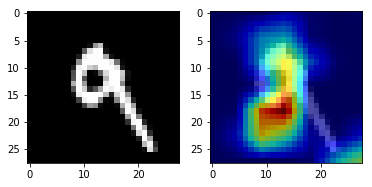

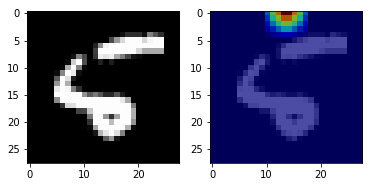

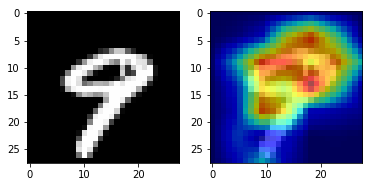

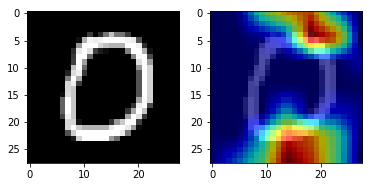

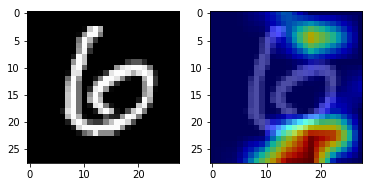

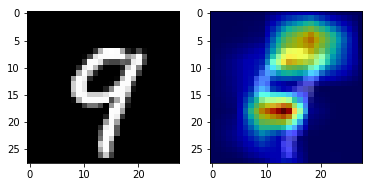

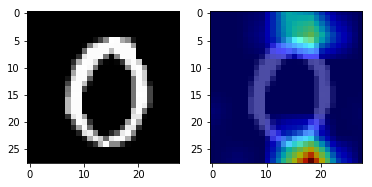

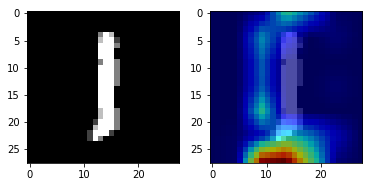

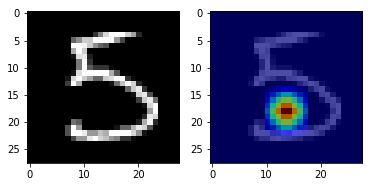

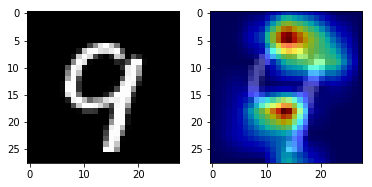

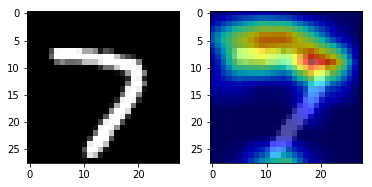

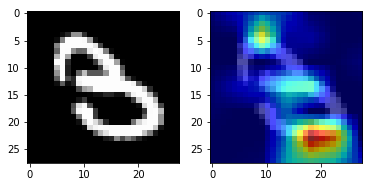

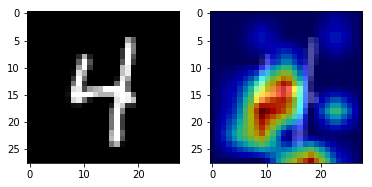

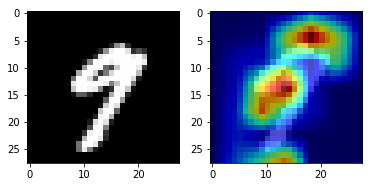

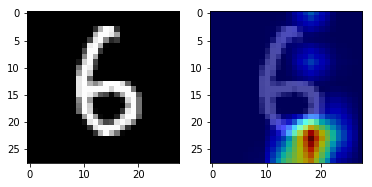

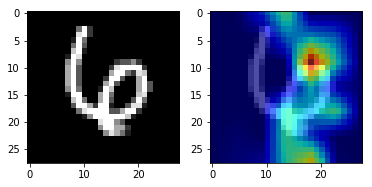

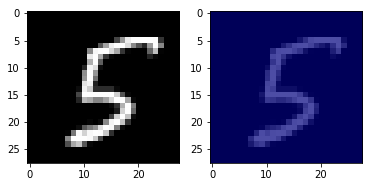

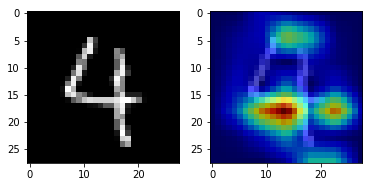

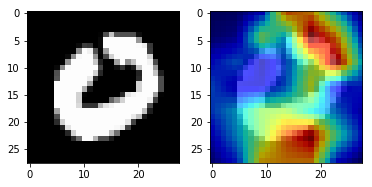

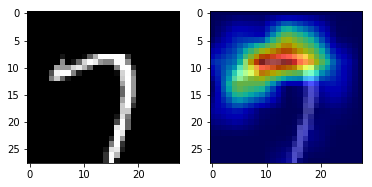

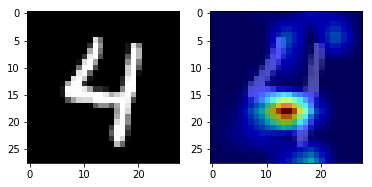

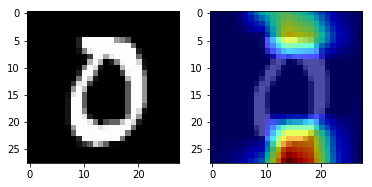

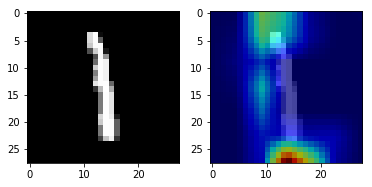

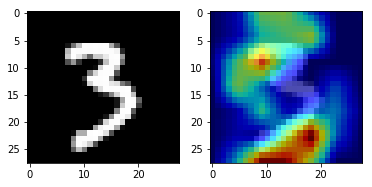

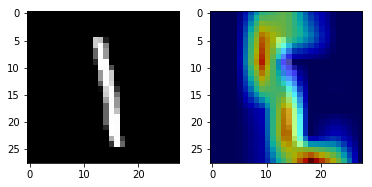

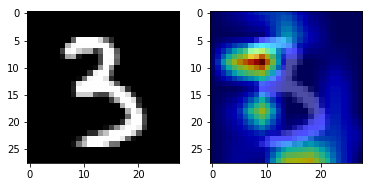

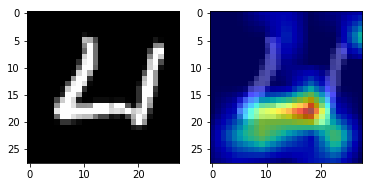

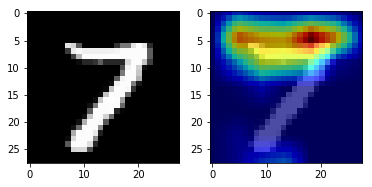

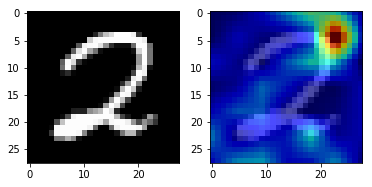

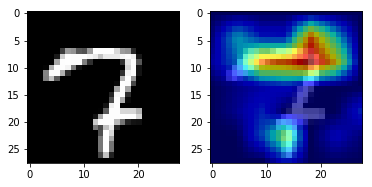

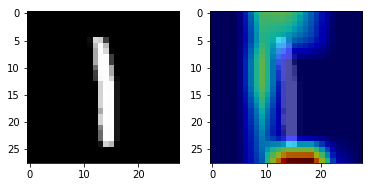

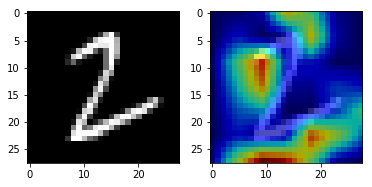

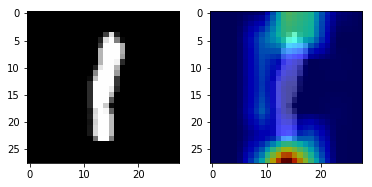

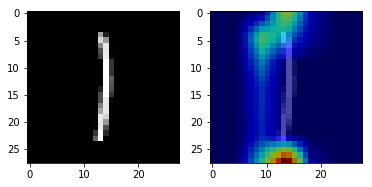

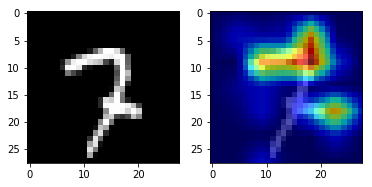

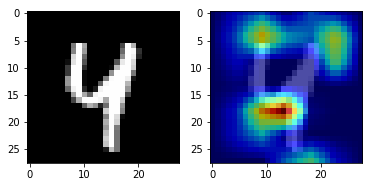

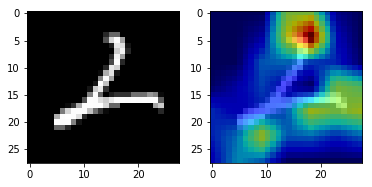

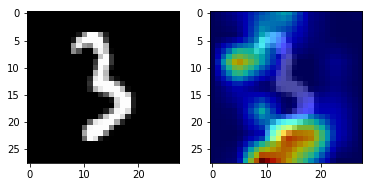

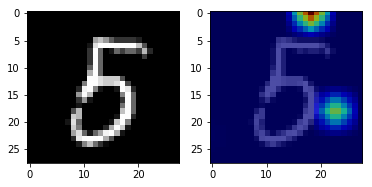

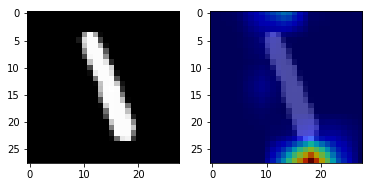

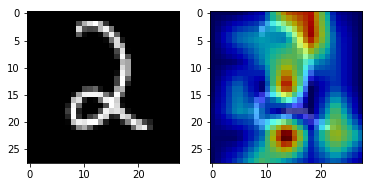

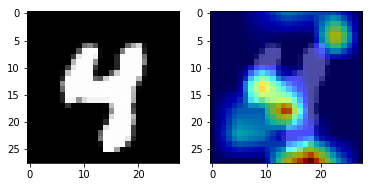

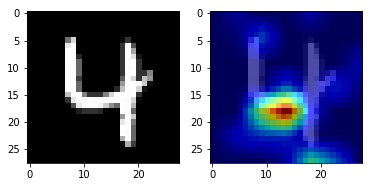

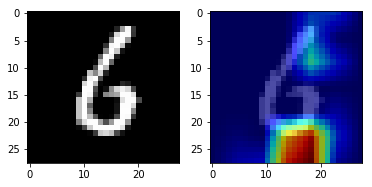

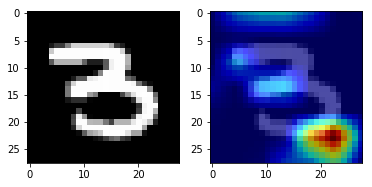

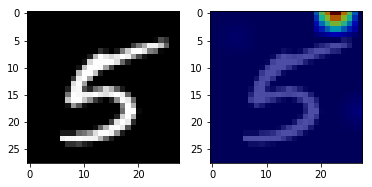

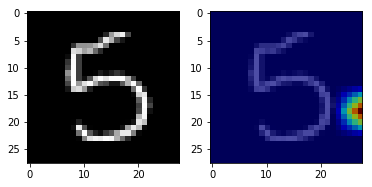

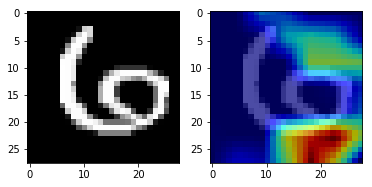

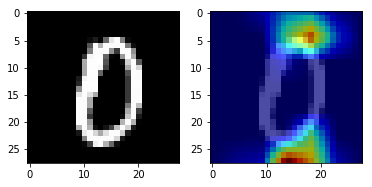

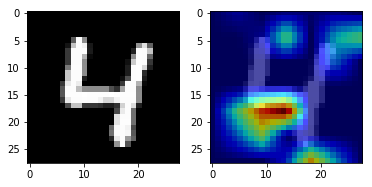

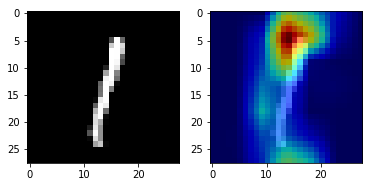

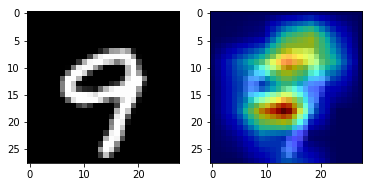

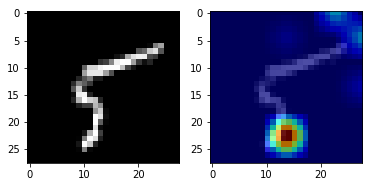

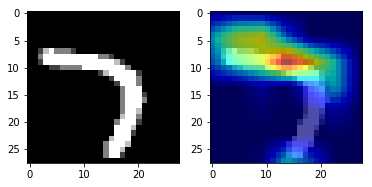

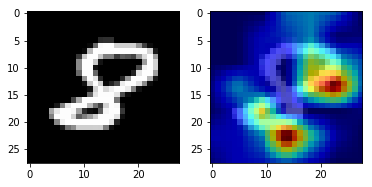

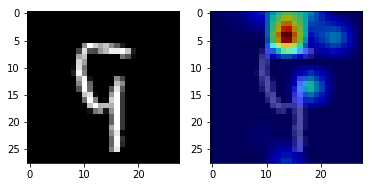

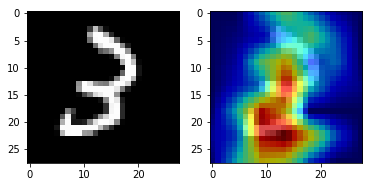

In [31]:
for __x, _sal in zip(x, sal):
    plt.figure()
    plt.subplot(121)
    plt.imshow(__x[:, :, 0], cmap='gray')
    plt.subplot(122)
    plt.imshow(__x[:, :, 0], cmap='gray')
    plt.imshow(zoom(_sal, (4, 4), order=1), cmap='jet', alpha=0.7)